# Cleaning and EDA:

I'll start off by doing some cleaning to our data set and fixing any data type issues we may have. Then I'll conduct some exploratory data analysis to find trends/patterns in the data

In [1]:
import pandas as pd                                                                                                                                                                                                                                                                                                                                #importsimport pandas as %pdQ
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.gridspec as gridspec 
from scipy import stats
from sklearn.preprocessing import StandardScaler


#options

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('chained_assignment', None)


In [2]:
#read in train data
train = pd.read_csv('./datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#checking for null values

#thanks to Chanakya Vivek Kapoor on Kaggle for this solution 

def null_values(df):
    
    columns = df.isnull().sum().index
    values = df.isnull().sum().values
    null_percentage = []
    
    #finding null values in each column, dividing by shape of the data frame and multiplying by 100
    [null_percentage.append((df[column]).isnull().sum()/ df[column].shape[0] * 100) for column in columns]
    
    null_dict = {'Columns':columns, 'Null Values': values, 'Percentage of Null Values': null_percentage}
    
    null_table = pd.DataFrame(data = null_dict)
    
    return null_table

In [4]:
null_table = null_values(train)
null_table.sort_values(by = 'Percentage of Null Values', ascending = False).head()

,Columns,Null Values,Percentage of Null Values
73,Pool QC,2042,99.561190
75,Misc Feature,1986,96.830814
7,Alley,1911,93.174061
74,Fence,1651,80.497318
58,Fireplace Qu,1000,48.756704


In [5]:
def df(dataset):
    #remove columns with more than 90% of null values.
    dataset = dataset.loc[:, dataset.isin([np.nan]).mean() < .90]
    
    #fill in null values for columns with missing data that I want to keep
    dataset.fillna({'Fireplace Qu': 'NA', 'Fence': 'NA', 'Lot Frontage': 0}, inplace = True)
    
    #remaping ordinal columns to numerical values
    dataset['Exter Qual'] = dataset['Exter Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA': 0})
    dataset['Exter Cond'] = dataset['Exter Cond'].map({'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'NA': 0})
    dataset['Bsmt Qual']= dataset['Bsmt Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA': 0})
    dataset['Bsmt Cond'] =dataset['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0})
    dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1, 'NA': 0})
    dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
    dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
    dataset['Heating QC'] = dataset['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
    dataset['Electrical'] = dataset['Electrical'].map({'SBrkr':4, 'FuseA':3, "FuseF":2, 'FuseP':1, 'Mix':0})
    dataset['Kitchen Qual']= dataset['Kitchen Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    dataset['Functional']= dataset['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0 })
    dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    dataset['Garage Finish'] = dataset['Garage Finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0 })
    dataset['Garage Qual'] =dataset['Garage Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    dataset['Garage Cond']= dataset['Garage Cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    dataset['Paved Drive']= dataset['Paved Drive'].map({'Y':3, 'P':2, 'N':1})
    dataset['Fence']= dataset['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0})
    
    #changing numeric data types to strings(object)
    dataset['Mo Sold'] = dataset['Mo Sold'].astype(str)
    dataset['Yr Sold'] = dataset['Yr Sold'].astype(str)
    dataset['MS SubClass'] = dataset['MS SubClass'].astype(str)
    #
#     #dummify left over categorical data columns
#     train_data = pd.get_dummies(data = train_data, columns = list(train_data.select_dtypes(['object']).columns), drop_first=True)
    
    #drop rest of null values less than 90%
    dataset.dropna(inplace=True)
    
    return dataset

## Dealing with missing values:

From our results above, 5 of our columns have about or over 50% of it's data missing.

It's important to note that a column having null values could mean that data was not recorded or does not exist(ie: NA in the 'Pool QC' column means the property has no pool) so it can still be valuable information.

For the purposes of this regression model, I will get rid of columns that contain more than 90% of null data which will be the **'Pool QC', 'Alley' and 'Misc Feature' columns**. It would mean that data is truly missing or these properties do not contain a misc feature, a pool or an alley which is not helping much from an analysis point of view.

## Ordinal and Nominal data:
Some of our data contains values that are ordinal, meaning that the values have some intrinsic order. This means they can be ranked from best to worst or numerically (from 1-5 for example). Converting our ordinal data columns would be best in order to assess their impact on the model I will create.
Nominal values have no intrinsic order and are typically descriptive. We will convert these to dummy columns later on.

## Data types:
In addition to changing our ordinal data to numeric columns, I've also changed some of our numeric columns to strings. **'Mo Sold', 'Year Sold', and 'MS Subclass'** are currently numeric but should be more of a string as they are descriptive. Our model might confuse the values and assume a higher value should be weighted more.  

In [6]:
train_data = df(train)

In [7]:
train_data.shape

(1866, 78)

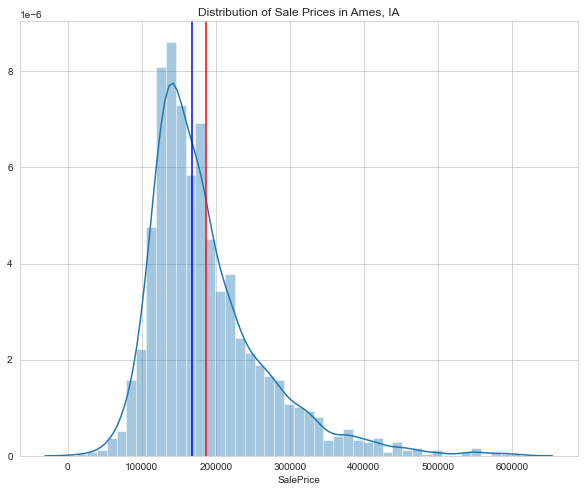

In [8]:
#checking distribution of our Sale Price data
plt.figure(figsize=(10,8))
sns.distplot(train_data.loc[:, 'SalePrice'], norm_hist = True,)
plt.axvline(x = train_data['SalePrice'].mean(), c = 'red')
plt.axvline(x = train_data['SalePrice'].median(), c = 'blue')
plt.title('Distribution of Sale Prices in Ames, IA');

## Distribution of Sale Price
Our housing price data seems to be slightly right skewed to normal but not exactly a bell shaped curve, meaning that our mean(red line) is higher than the median(blue line). This could be because we have homes that tend to be higher priced thereby offsetting our data. We will need to correct for outliers in order to normalize our data.

To fix this issue, I'll apply a log transformation to the Sale Price data and correct the skew.

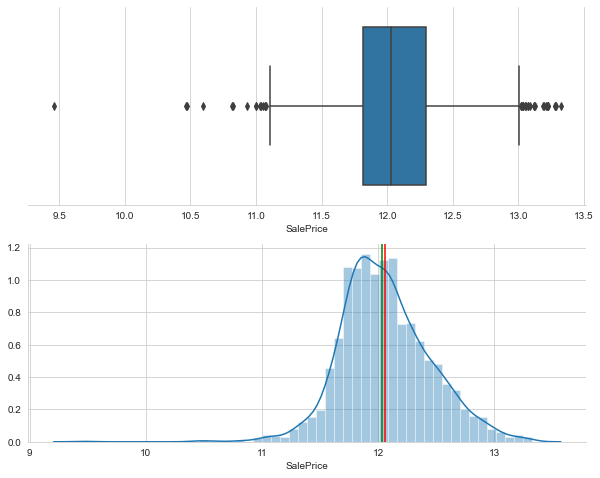

In [9]:
x = np.log1p(train_data['SalePrice'])
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(10,8))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()

My data is now more left skewed as it has a longer left tail but the still follows a normal distribution. This could be because we have a larger mean value. Nonetheless our Sale Price has now been normalized by performing a log transformation. 

## Correlation to Sale Price
Let's examine which independent variables are the most correlated to our target variable.

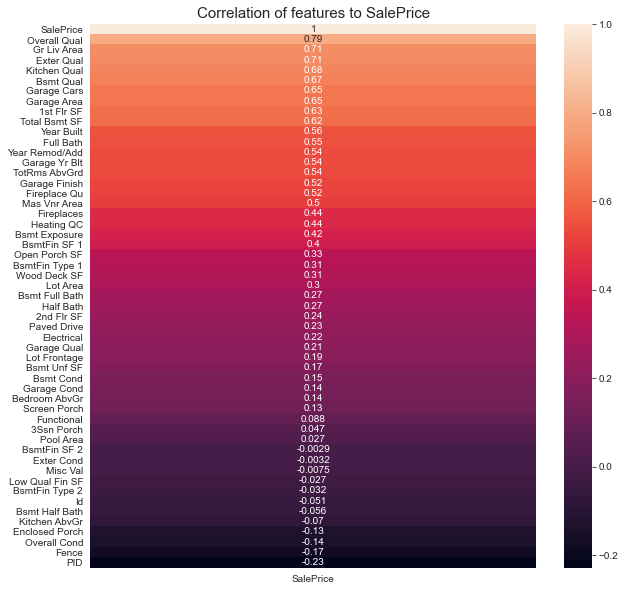

In [10]:
corr = train_data.corr()['SalePrice'].sort_values(ascending = False).to_frame()
plt.figure(figsize=(10,10))
plt.title('Correlation of features to SalePrice', fontsize = 15)
sns.heatmap(corr, annot = True,linecolor='black');

According to the heatmap, the top 5 values most correlated with price are as follows:
- Overall Qual
- Gr Liv Area
- Exter Qual
- Kitchen Qual
- Bsmt Qual

## Visualizing variables highly correlated with Sale Price

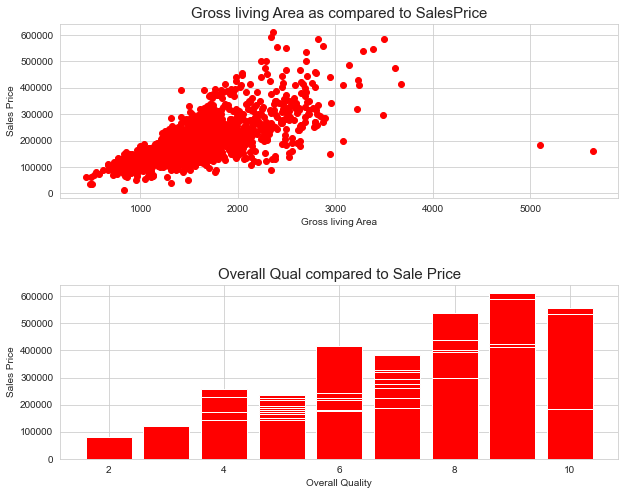

In [11]:
fig, axs = plt.subplots(2,figsize = (10,8))
fig.subplots_adjust(hspace = 0.5)
axs[0].scatter(x = train_data['Gr Liv Area'], y = train_data['SalePrice'], c = 'red')
axs[0].set_title('Gross living Area as compared to SalesPrice', fontsize = 15)
axs[0].set_xlabel("Gross living Area")
axs[0].set_ylabel('Sales Price')

x = train_data['Overall Qual']
y = train_data['SalePrice']
axs[1].bar(x, y, color = 'red')
axs[1].set_title('Overall Qual compared to Sale Price', fontsize = 15)
axs[1].set_xlabel('Overall Quality')
axs[1].set_ylabel('Sales Price');

In [12]:
#dropping outliers from Gross living area
train_data.loc[train_data['Gr Liv Area'] > 4000]
train_data.drop(labels=[960, 1885], inplace=True)
train_data.shape

(1864, 78)

## Multi Collinearity
- What is Multi Collinearity?
    - It is when multiple independent variables can predict each other, hence making it difficult for the regression model to know which variables are directly impacting the target variable the most.

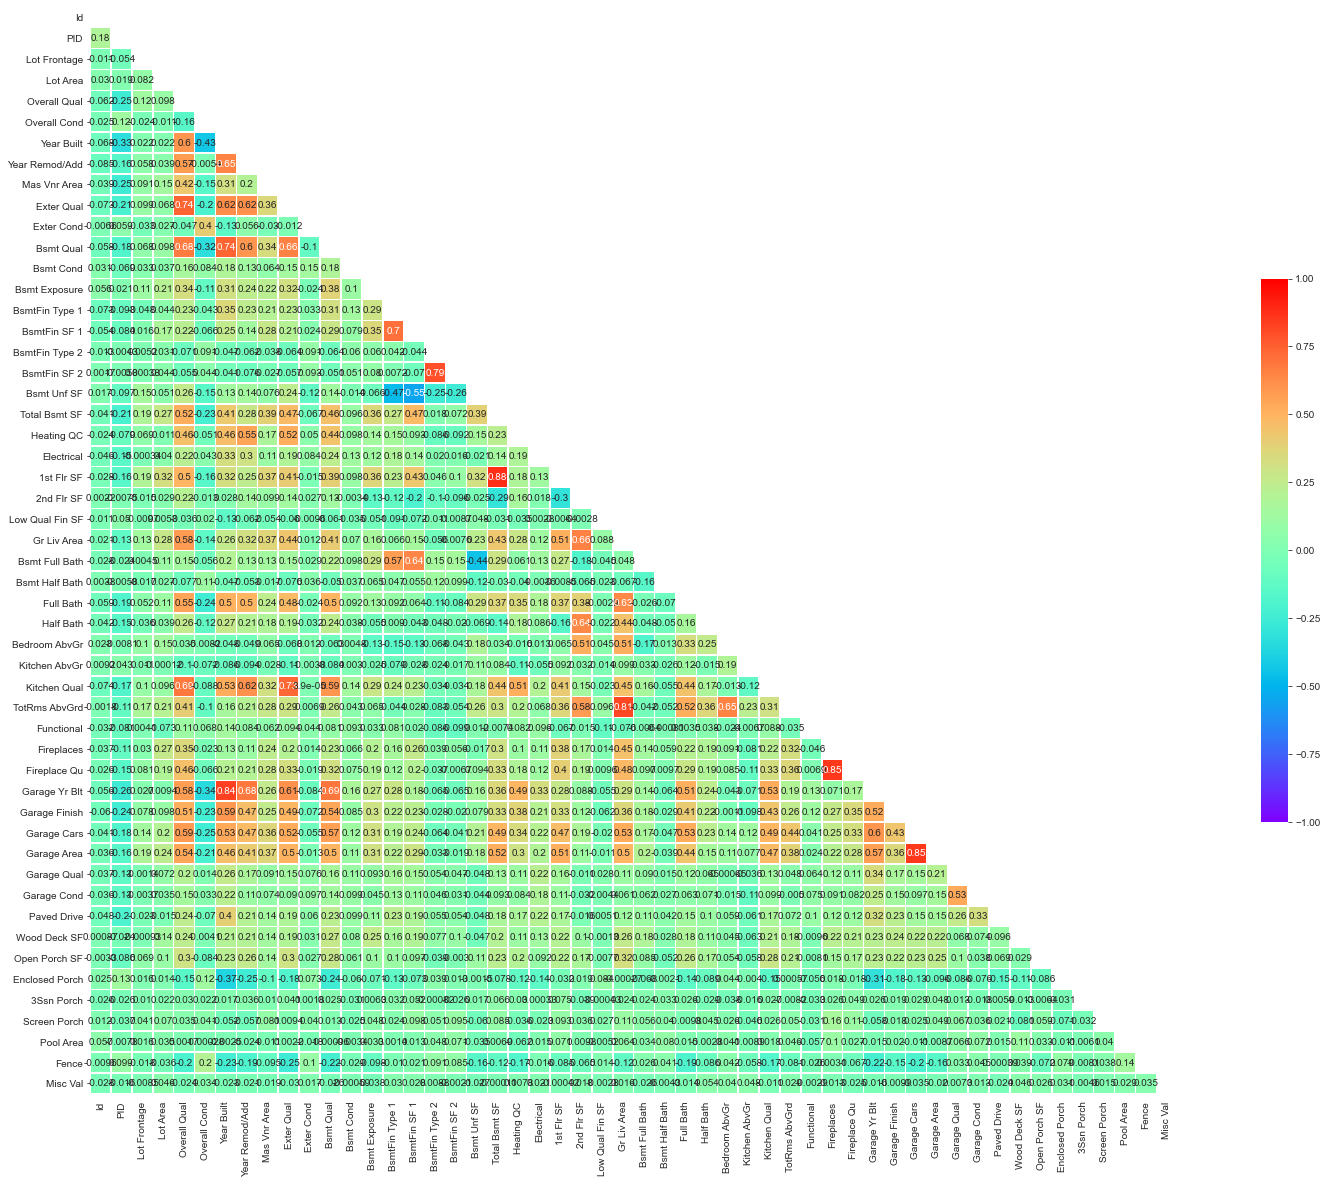

In [13]:
# searching for multicolinarity in each numerical variable

#Tweaking diagonal correlation example from seaborn.pydata.org

#correlation dataframe of independent variables only
new_corr = train_data.drop(columns='SalePrice')
corr = new_corr.corr()
#generate mask for uper triangle
masked_corr = np.triu(np.ones_like(corr, dtype = bool))
#mtplotlib figure
fig, ax = plt.subplots(figsize = (30,20))
#color map
cmap = sns.diverging_palette(230, 30, as_cmap=True)

#draw heatmap
sns.heatmap(corr,mask= masked_corr, vmin= -1,vmax= 1, center= 0, annot=True, cmap= 'rainbow',
           square= True, linewidths= .5, cbar_kws={"shrink": .5}); 

Even though the heatmap is a little busy, I can see that a few of our independent variables are highly correlated with each other. I'll examining the variables in **RED** as that signifies the highest correlation(i.e: .75 and above).Let's take a closer look at some of those variables.

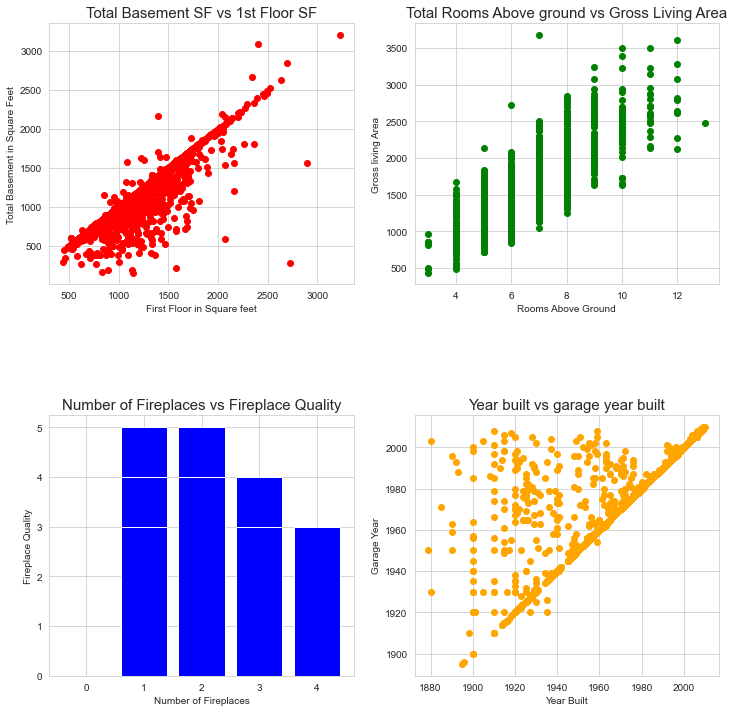

In [14]:
#Creating visuals for variables that are higly correlated
fig, axs = plt.subplots(2,2,figsize = (12,12))
fig.subplots_adjust(hspace = 0.5)
axs[0,0].scatter(x = train_data['1st Flr SF'], y = train_data['Total Bsmt SF'], c = 'red')
axs[0,0].set_title('Total Basement SF vs 1st Floor SF', fontsize= 15)
axs[0,0].set_xlabel("First Floor in Square feet")
axs[0,0].set_ylabel('Total Basement in Square Feet')

axs[0,1].scatter(x = train_data['TotRms AbvGrd'], y = train_data['Gr Liv Area'], c = 'green')
axs[0,1].set_title('Total Rooms Above ground vs Gross Living Area', fontsize = 15)
axs[0,1].set_xlabel("Rooms Above Ground")
axs[0,1].set_ylabel('Gross living Area')

x = train_data['Fireplaces']
y = train_data['Fireplace Qu']
axs[1,0].bar(x, y, color = 'blue')
axs[1,0].set_title('Number of Fireplaces vs Fireplace Quality', fontsize = 15)
axs[1,0].set_xlabel("Number of Fireplaces")
axs[1,0].set_ylabel('Fireplace Quality')

axs[1,1].scatter(x = train_data['Year Built'], y = train_data['Garage Yr Blt'], c = 'orange')
axs[1,1].set_title('Year built vs garage year built', fontsize = 15)
axs[1,1].set_xlabel("Year Built")
axs[1,1].set_ylabel('Garage Year');

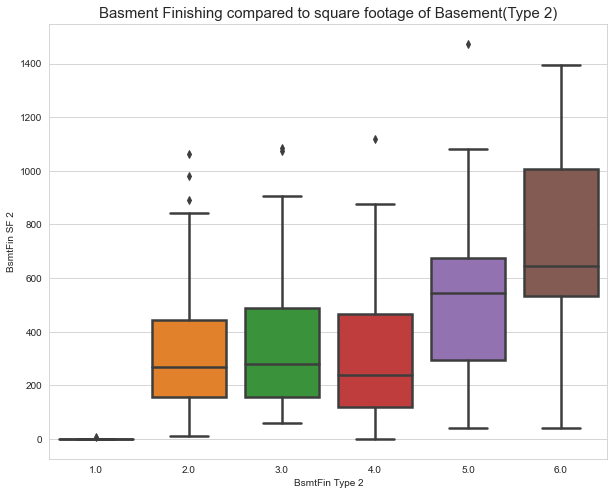

In [15]:
plt.figure(figsize=(10,8))
plt.title('Basment Finishing compared to square footage of Basement(Type 2)', fontsize =15)
sns.boxplot(x = train_data['BsmtFin Type 2'], y = train_data['BsmtFin SF 2'], linewidth= 2.5);

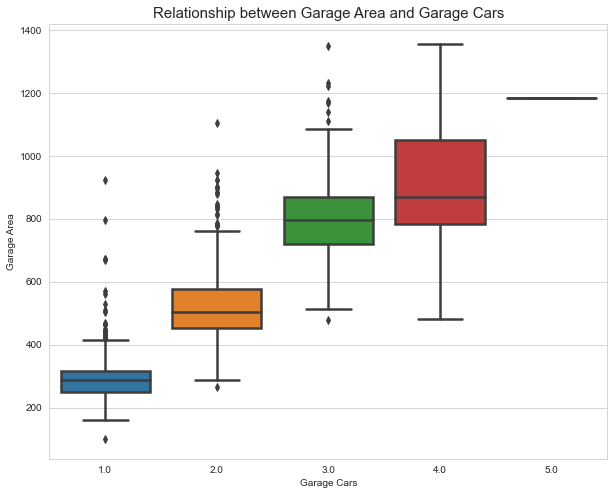

In [16]:
plt.figure(figsize=(10,8))
plt.title('Relationship between Garage Area and Garage Cars', fontsize = 15)
sns.boxplot(x = train_data['Garage Cars'], y = train_data['Garage Area'],linewidth= 2.5);

## Observations of multi collinearity
- With the exception of a few outliers, these variables are highly correlated to each other. As one variable goes up, so does the other or vice versa, as is the case with fireplace quality and number of fireplaces. 

- *Total Basement SF vs first floor SF*
    - This shows a linear relationship with the exception of a few outliers. This means that how large the 1st floor is is directly correlated with the size of the basement 
    
- *Total Rooms Above grade vs Gross living area*
    - Also showcases an upward trending relationship. The number of rooms in a home(not including bathrooms) is directly related to the gross living area, which isn't much of a surprise.

- *Fireplace Quality vs Number of fireplaces*
    - At first we see an increasing linear relationship between the two variables. As the number of fireplaces increases however, there is a decline in it's quality which shows an inverse relationship.
    
- *Year Built vs Garage Year built*
    - Now, we see an almost perfectly linear relationship. The diagram does show that there are garages that were built years later after the home was.

- *Basement Finishing (Type 2) vs Basment SF (Type 2)*
    - There's is a gradual trend upwards trend with this relationship. As the Finishing quality increases, so does the square footage, which implies that the quality of the basement living quarters is directly related to how large the basement is.
    
- Garage Cars vs Garage Area:
    - Also witnessing an upwards trend. The more car garages we have the bigger the garage area. 
    

## What does this mean?
- Collinearity is a big issue for a machine learning model because it doesn't allow us to accurately pinpoint which independent variable has the most effect on the dependent. Instead, one independent variable predicts the other thereby leaving us with duplicate results which reduces the accuracy of our model. For this project, I will feature engineer a few of those variables to reduce multi collinearity.

## Combine train and test data

In [17]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [18]:
test = df(test)
train_saleprice = train['SalePrice'].to_frame()

train_saleprice.head()


,SalePrice
0,130500
1,220000
2,109000
3,174000
4,138500


In [19]:
#combine the dataframes
combined_data = pd.concat((train_data, test), sort = False).reset_index(drop = True)
combined_data.drop(['SalePrice'], axis = 1, inplace = True)
combined_data.shape

(2675, 77)

## Feature engineering:

In this section, I'll be creating new features that can fix our multi collinear variables by using raw data we already have.

In [20]:
#making copy of train dataset
new_train = train_data.copy()

In [21]:
#creating new features using raw data
new_train['Total SF'] = new_train['Total Bsmt SF'] + new_train['Gr Liv Area']
new_train['Has Bsmt'] = new_train['Total Bsmt SF'].apply(lambda x :1 if x > 0 else 0 )
new_train['Has Pool'] = new_train['Pool Area'].apply(lambda x : 1 if x > 0 else 0)
new_train['Has Garage'] = new_train['Garage Cars'].apply(lambda x: 1 if x > 0 else 0)
new_train['Has Fireplace'] = new_train['Fireplaces'].apply(lambda x :1 if x > 0 else 0)
new_train['Has 2ndFlr'] = new_train['2nd Flr SF'].apply(lambda x: 1 if x > 0 else 0)
new_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total SF,Has Bsmt,Has Pool,Has Garage,Has Fireplace,Has 2ndFlr
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0,0,3,2010,WD,130500,2204.0,1,0,1,0,1
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0,0,4,2009,WD,220000,3035.0,1,0,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0,0,1,2010,WD,109000,2114.0,1,0,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0,0,4,2010,WD,174000,1828.0,1,0,1,0,1
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0,0,3,2010,WD,138500,2121.0,1,0,1,0,1


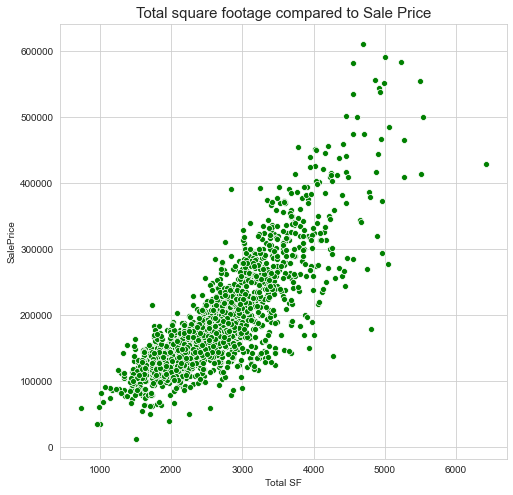

In [22]:
#checking correlations of featured engineered variables to Sale Price
plt.figure(figsize=(8,8))
plt.title('Total square footage compared to Sale Price', fontsize = 15)
sns.scatterplot(data = new_train, x = 'Total SF', y = 'SalePrice', color = 'green');

Total squarefootage is linear to Saleprice. As the squarefoot of home increases, we can expect the Sale price to do the same

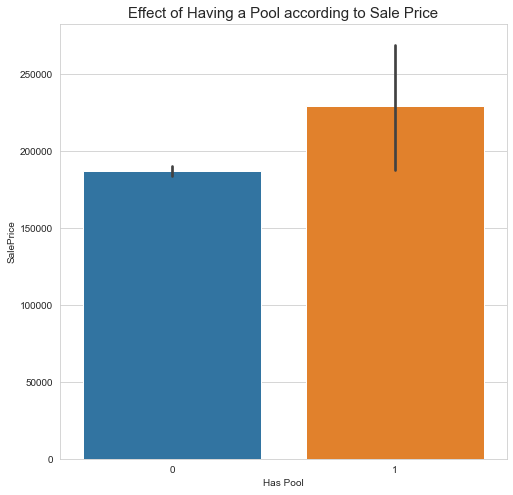

In [23]:
plt.figure(figsize=(8,8))
plt.title('Effect of Having a Pool according to Sale Price', fontsize = 15)
sns.barplot(data = new_train, x = 'Has Pool', y= 'SalePrice');

Having a pool significantly increases Saleprice. On average, sellers can expect at least $50,000 more in Sale price if their home includes a pool, holding all other values constant.

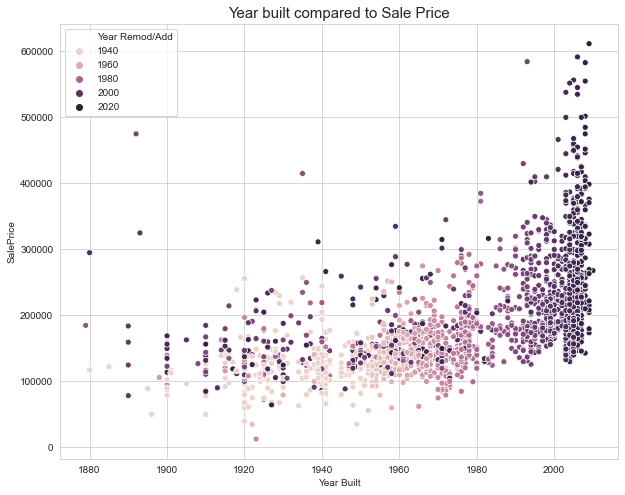

In [24]:
plt.figure(figsize=(10,8))
plt.title('Year built compared to Sale Price', fontsize = 15)
sns.scatterplot(data = new_train, x = 'Year Built', y = 'SalePrice', hue = new_train['Year Remod/Add']);

This visual shows that homes built and or remodeled in later years (especially after 2000) command the highest price in this market.

## More Exploratory Analysis

In [25]:
def visuals(data, x, y, palette):
    plt.figure(figsize=(15,10))
    plt.title(f'Relationship between {x} and {y}', fontsize = 15) 
    sns.barplot(data = data, x = x, y= y, palette= palette)
    plt.xticks(fontsize = 7)
    sns.despine(left=True, bottom = True)
    return visuals

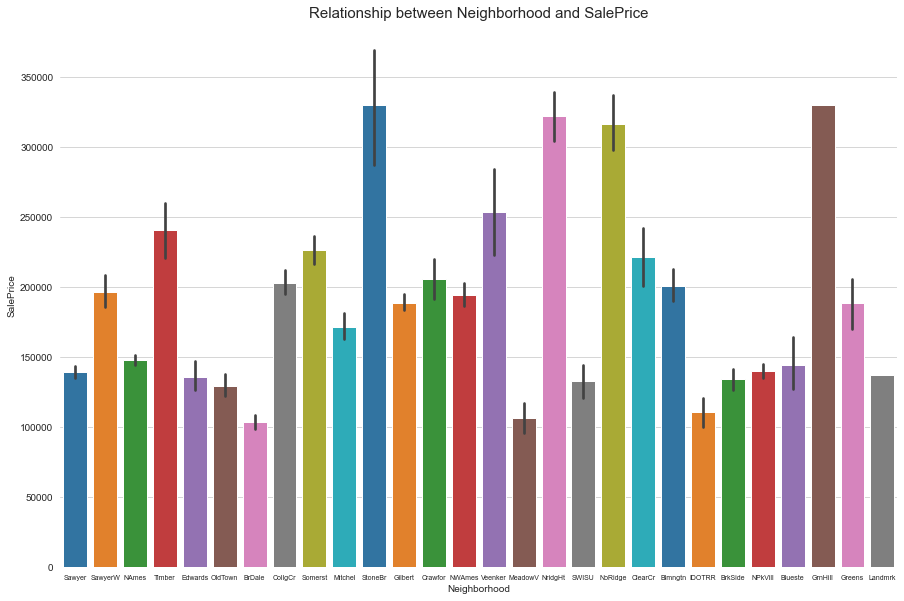

In [26]:
visuals(new_train, 'Neighborhood', 'SalePrice', palette='tab10');

The most expensive neighborhood in Ames, IA is StoneBr. Sellers living in this neighborhood can expect a higher sale price for their homes than any other neighborhood, holding all other factors constant that is 

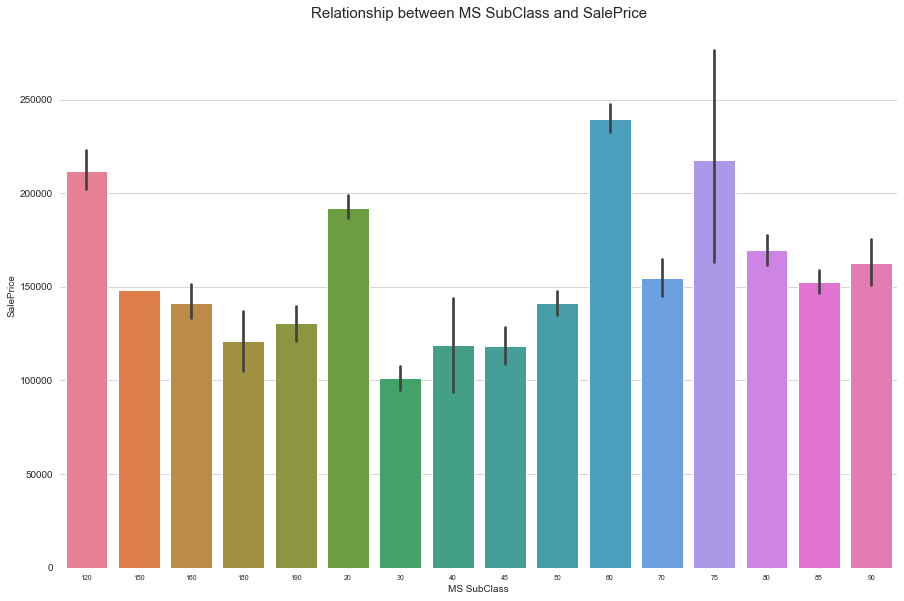

In [27]:
visuals(new_train, 'MS SubClass', 'SalePrice', 'husl');

As listed in the county files, an MS Sub class identifies the dwelling type of the home. An MS Sub Class of 75 means that the house is a 2 1/2 story structure. This would mean that the most expenisve homes in Ames, IA tend to be the 2 1/2 story houses, signifying that the town is oriented more towards families.

In [28]:
new_train.loc[:].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total SF,Has Bsmt,Has Pool,Has Garage,Has Fireplace,Has 2ndFlr
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0,0,3,2010,WD,130500,2204.0,1,0,1,0,1
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0,0,4,2009,WD,220000,3035.0,1,0,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0,0,1,2010,WD,109000,2114.0,1,0,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0,0,4,2010,WD,174000,1828.0,1,0,1,0,1
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0,0,3,2010,WD,138500,2121.0,1,0,1,0,1


## Line Assumptions:

In this section I'll check to make sure our data adheres to the 'Line' Assumptions which are:

- Linear relationship between dependent and independent variables
- Independence of variables (No multi colinearity)
- Equality of variances (Homoscedacity)
- Normality: residuals of model are normally distributed

In [29]:
from scipy.special import boxcox, inv_boxcox

In [30]:
#credit to Chanya from Kaggle here

def three_chart_plot(df, feature):
    fig = plt.figure(figsize = (12, 10))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig, wspace=0.5, hspace= 0.5)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )


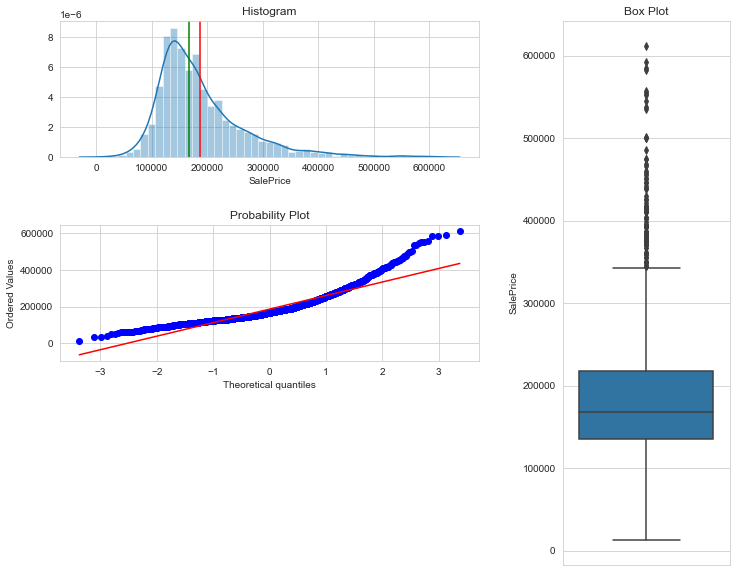

In [31]:
# new_train['SalePrice'] = np.log1p(new_train['SalePrice'])
three_chart_plot(new_train, 'SalePrice')

From the plot above, we can see that our data does not follow a normal distribution which violates of  the **LINE** assumptions. 
A major observervation here, our distribution plot has a very long right tail signifying a right skewed distribution.This means that there are homes in the area that are priced far above the mean, . Why could that be? What about these homes contribute to such a jump in Sale price? Let's explore further.

In [37]:
pricey_homes = new_train.loc[new_train['SalePrice'] >= 350000]
pricey_homes.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total SF,Has Bsmt,Has Pool,Has Garage,Has Fireplace,Has 2ndFlr
68,1707,528150040,20,RL,94.0,13615,Pave,IR1,HLS,AllPub,Corner,Mod,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,MetalSd,MetalSd,Stone,510.0,5,3,PConc,5.0,3.0,4.0,1.0,0.0,1.0,0.0,1802.0,1802.0,GasA,5,Y,4,1802,0,0,1802,0.0,0.0,2,1,3,1,5,7,7,1,4,Attchd,2006.0,3.0,3.0,843.0,3.0,3.0,3,158,105,0,0,0,0,0,0,6,2007,WD,372000,3604.0,1,0,1,1,0
81,367,527214050,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,5,3,PConc,5.0,3.0,1.0,6.0,1904.0,1.0,0.0,312.0,2216.0,GasA,5,Y,4,2234,0,0,2234,1.0,0.0,2,0,1,1,5,9,7,1,4,Attchd,2009.0,3.0,3.0,1166.0,3.0,3.0,3,0,60,0,0,0,0,0,0,7,2009,New,501837,4450.0,1,0,1,1,0
99,2450,528358030,60,RL,83.0,10019,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1995,Hip,CompShg,VinylSd,VinylSd,BrkFace,397.0,4,3,PConc,4.0,3.0,1.0,5.0,527.0,1.0,0.0,815.0,1342.0,GasA,5,Y,4,1358,1368,0,2726,0.0,0.0,2,1,4,1,4,9,7,1,5,Attchd,1995.0,2.0,3.0,725.0,3.0,3.0,3,307,169,168,0,0,0,0,0,6,2006,WD,350000,4068.0,1,0,1,1,1
100,1013,527214030,20,RL,53.0,15401,Pave,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,296.0,5,3,PConc,5.0,3.0,4.0,6.0,1337.0,1.0,0.0,547.0,1884.0,GasA,5,Y,4,1884,0,0,1884,1.0,0.0,2,0,2,1,5,7,7,1,4,Attchd,2004.0,3.0,3.0,670.0,3.0,3.0,3,214,76,0,0,0,0,0,0,9,2008,WD,387000,3768.0,1,0,1,1,0
138,2331,527210040,60,RL,60.0,18062,Pave,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,662.0,5,3,PConc,5.0,3.0,4.0,1.0,0.0,1.0,0.0,1528.0,1528.0,GasA,5,Y,4,1528,1862,0,3390,0.0,0.0,3,1,5,1,5,10,7,1,5,BuiltIn,2006.0,3.0,3.0,758.0,3.0,3.0,3,204,34,0,0,0,0,0,0,9,2006,New,545224,4918.0,1,0,1,1,1


In [47]:
pricey_homes.shape

(84, 84)

In [49]:
less_pricey.shape

(1784, 84)

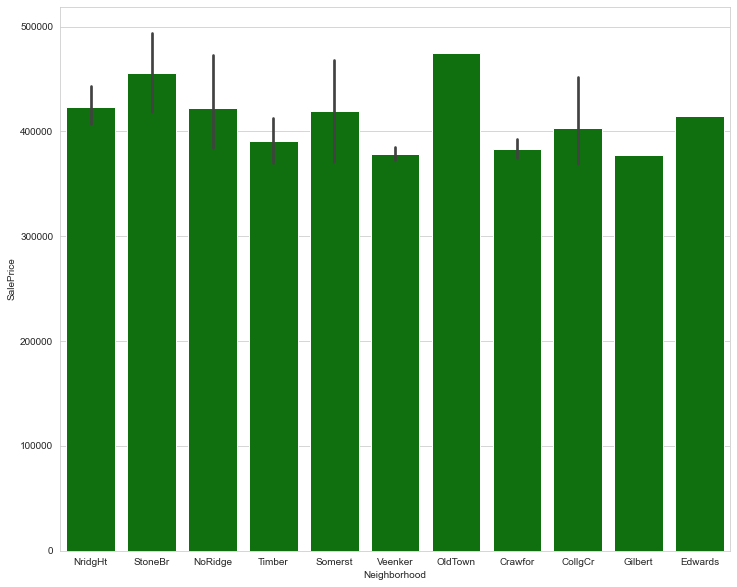

In [42]:
#examining the neighborhoods
plt.figure(figsize=(12,10))
sns.barplot(x = pricey_homes['Neighborhood'], y = pricey_homes['SalePrice'], color = 'Green')
plt.xticks(fontsize = 10);

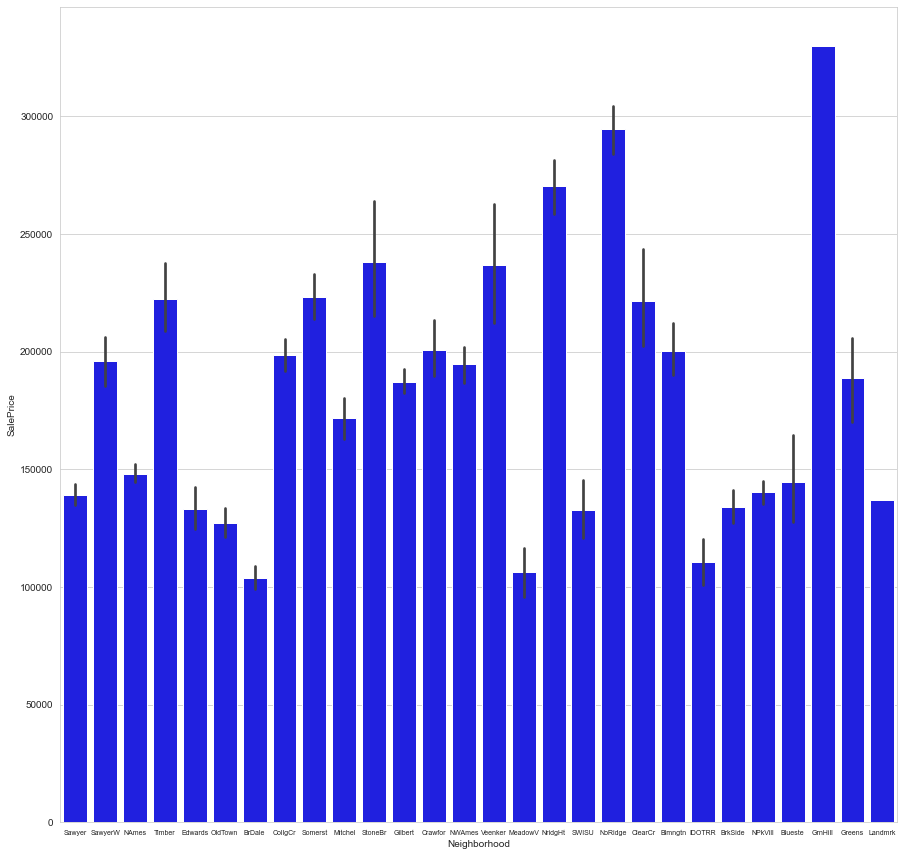

In [46]:
less_pricey = new_train.loc[new_train['SalePrice'] <= 350000]
plt.figure(figsize=(15,15))
sns.barplot(x = less_pricey['Neighborhood'], y = less_pricey['SalePrice'], color = 'blue')
plt.xticks(fontsize = 7);

From these two graphs we can see that there's a reason for the high increase in price and it is not random errors. 

In our first bar chat examining the Sales price to Neighborhood, 'StoneBr' emerged as the most expensive. But with further analysis, we see that it happens to be a few homes that are driving up this price. Another example is the 'OldTown' neighborhood which apprears to have a few homes over the \\$350000 price range but when we examine the **less_pricey** data, we see that most homes in that neighborhood have an average sale price close to \\$150000